In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file = pd.read_csv('MSN2_fuel_ind')

In [9]:
# Set to show all columns
pd.set_option('display.max_columns', None)

In [7]:
file = file.drop(["Unnamed: 0"],axis=1)

In [ ]:
# No leakage: Average of flight phase 3, very low fuel pitch, altitude of 800, leak detection leak flow of -6, pitch angle of 0.8, transfer mode of 1.5, 
# Value_FOB of 3835, num engines running is 3.6, STATE_MAIN_STBY_IMMERSED is 0.2, FUEL_USED is 4000, FUEL_FLOW is 1700

# Leakage: Average of flight phase 7, fuel pitch of 2.8, altitude of 11k, leak detection leak flow of -56, pitch angle of 4.4, transfer mode of 5.3, 
# Value_FOB of 19100, num engines running is 3.8, STATE_MAIN_STBY_IMMERSED is 1 flat, FUEL_USED is 7600, FUEL_FLOW is 3900

In [14]:
subplots_file = file[["STATUS_FUEL_LEAK_DETECTED_VALID","FLIGHT_PHASE_COUNT","FUEL_PITCH","FW_GEO_ALTITUDE","LEAK_DETECTION_LEAK_FLOW","PITCH_ANGLE","TRANSFER_MODE","VALUE_FOB","Num_Engines_Running","STATE_MAIN_STBY_IMMERSED","FUEL_USED","FUEL_FLOW"]]
subplots_file.head()

,STATUS_FUEL_LEAK_DETECTED_VALID,FLIGHT_PHASE_COUNT,FUEL_PITCH,FW_GEO_ALTITUDE,LEAK_DETECTION_LEAK_FLOW,PITCH_ANGLE,TRANSFER_MODE,VALUE_FOB,Num_Engines_Running,STATE_MAIN_STBY_IMMERSED,FUEL_USED,FUEL_FLOW
0,1.0,1.0,0.0,272.000,0.0,0.719604,NaN,26988.0,0,True,0.0,0.0
1,1.0,1.0,0.0,271.625,0.0,0.719604,NaN,26988.0,0,True,0.0,0.0
2,1.0,1.0,0.0,272.000,0.0,0.719604,NaN,26988.0,0,True,0.0,0.0
3,1.0,1.0,0.0,272.125,0.0,0.719604,NaN,26988.0,0,True,0.0,0.0
4,1.0,1.0,0.0,272.125,0.0,0.719604,NaN,26988.0,0,True,0.0,0.0


In [16]:
leak_1 = subplots_file[subplots_file["STATUS_FUEL_LEAK_DETECTED_VALID"]==1.0].drop(["STATUS_FUEL_LEAK_DETECTED_VALID"],axis=1)
leak_0 = subplots_file[subplots_file["STATUS_FUEL_LEAK_DETECTED_VALID"]==0.0].drop(["STATUS_FUEL_LEAK_DETECTED_VALID"],axis=1)

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


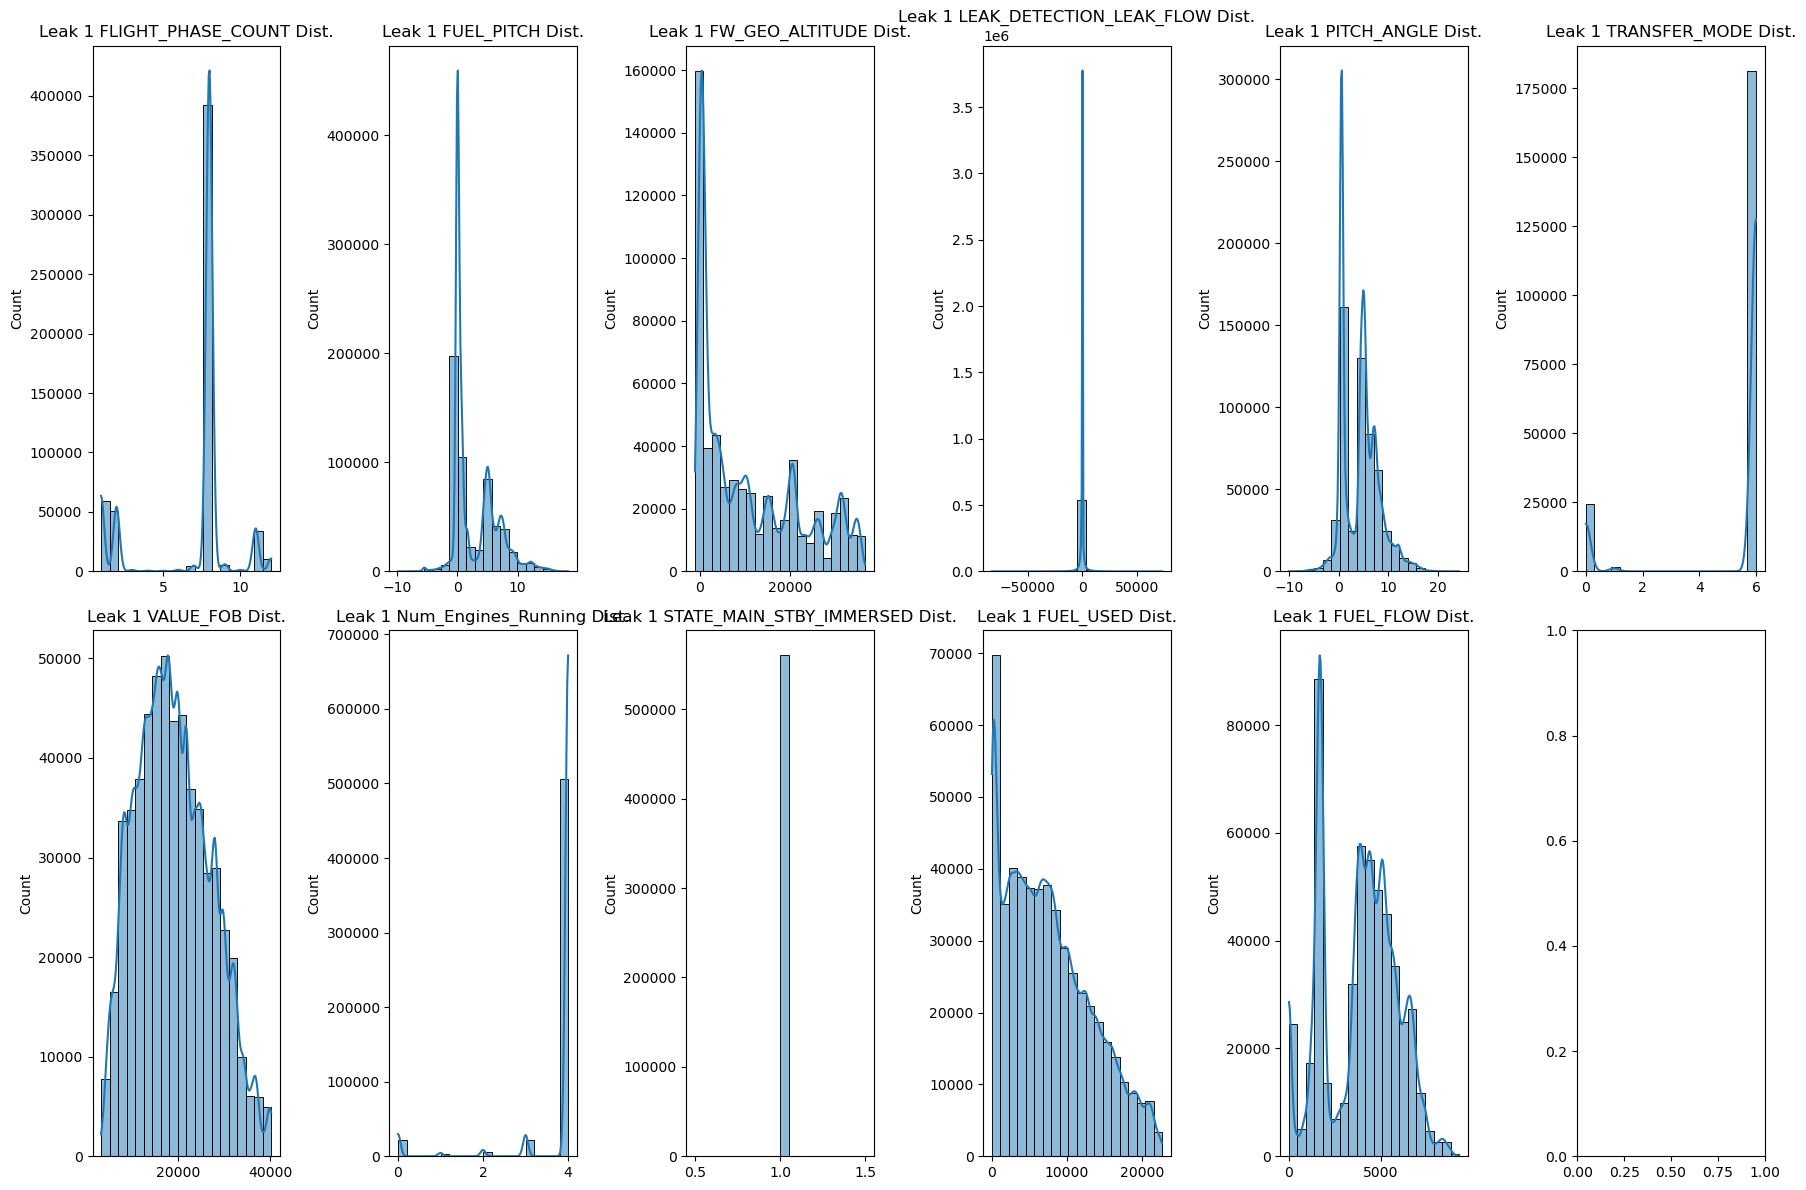

In [20]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5)

# Iterate through features and plot their distributions
for i, feature in enumerate(leak_1):
    row, col = divmod(i, 6)
    sns.histplot(leak_1[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Leak 1 {feature} Dist.')
    axes[row, col].set_xlabel('')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


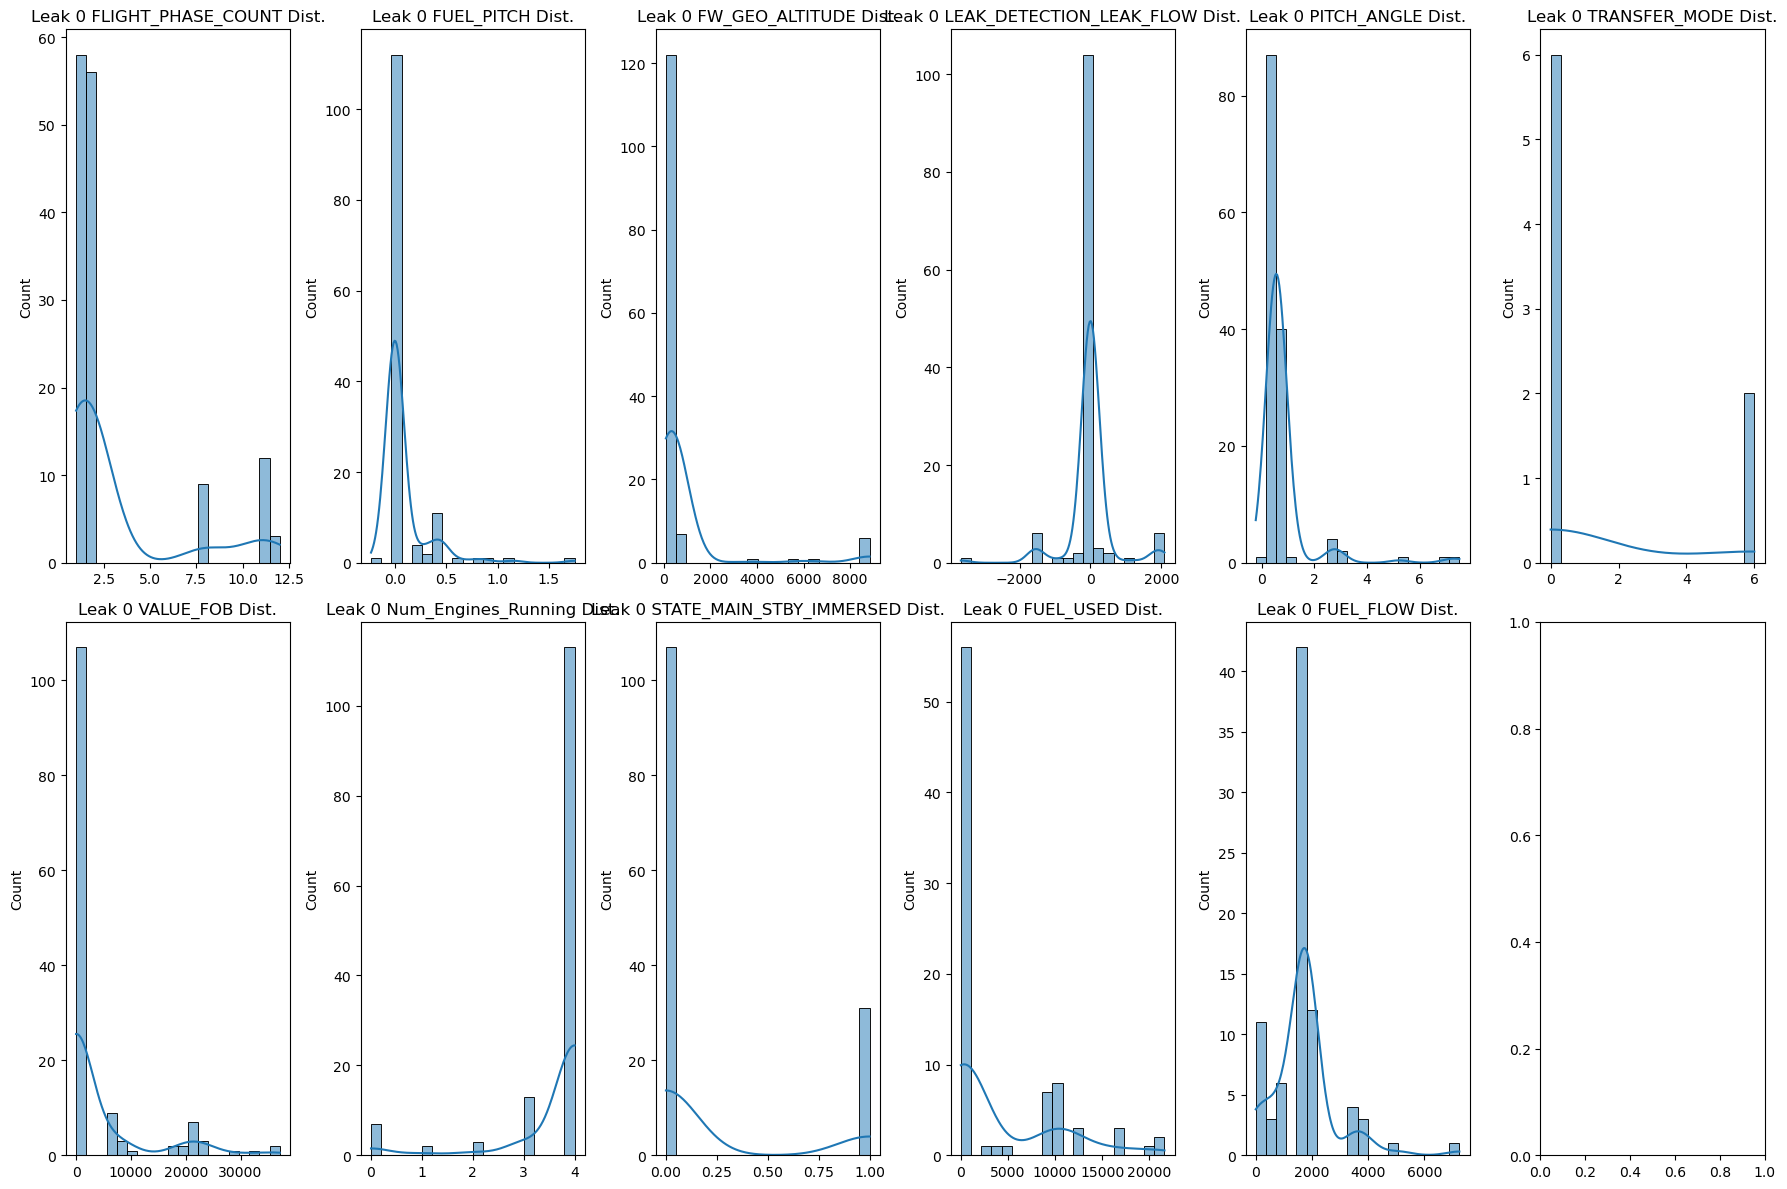

In [21]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 12))
fig.subplots_adjust(hspace=0.5)

# Iterate through features and plot their distributions
for i, feature in enumerate(leak_0):
    row, col = divmod(i, 6)
    sns.histplot(leak_0[feature], bins=20, kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'Leak 0 {feature} Dist.')
    axes[row, col].set_xlabel('')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [23]:
# There is no need for num_engines_running
file = file.drop(["Num_Engines_Running"],axis=1)

In [26]:
# Let's look at correlations between similar variables, to see if we can combine into one variable
file_resolved = file[["STATUS_FUEL_LEAK_DETECTED_VALID","RESOLVED_STATE_V_D","RESOLVED_STATE_V_LP1","RESOLVED_STATE_V_LP2","RESOLVED_STATE_V_LP3","RESOLVED_STATE_V_LP4","RESOLVED_STATE_V_RM","RESOLVED_STATE_V_T1","RESOLVED_STATE_V_T2","RESOLVED_STATE_V_T3","RESOLVED_STATE_V_T4","RESOLVED_STATE_V_X1","RESOLVED_STATE_V_X2","RESOLVED_STATE_V_X3","RESOLVED_STATE_V_X4"]]

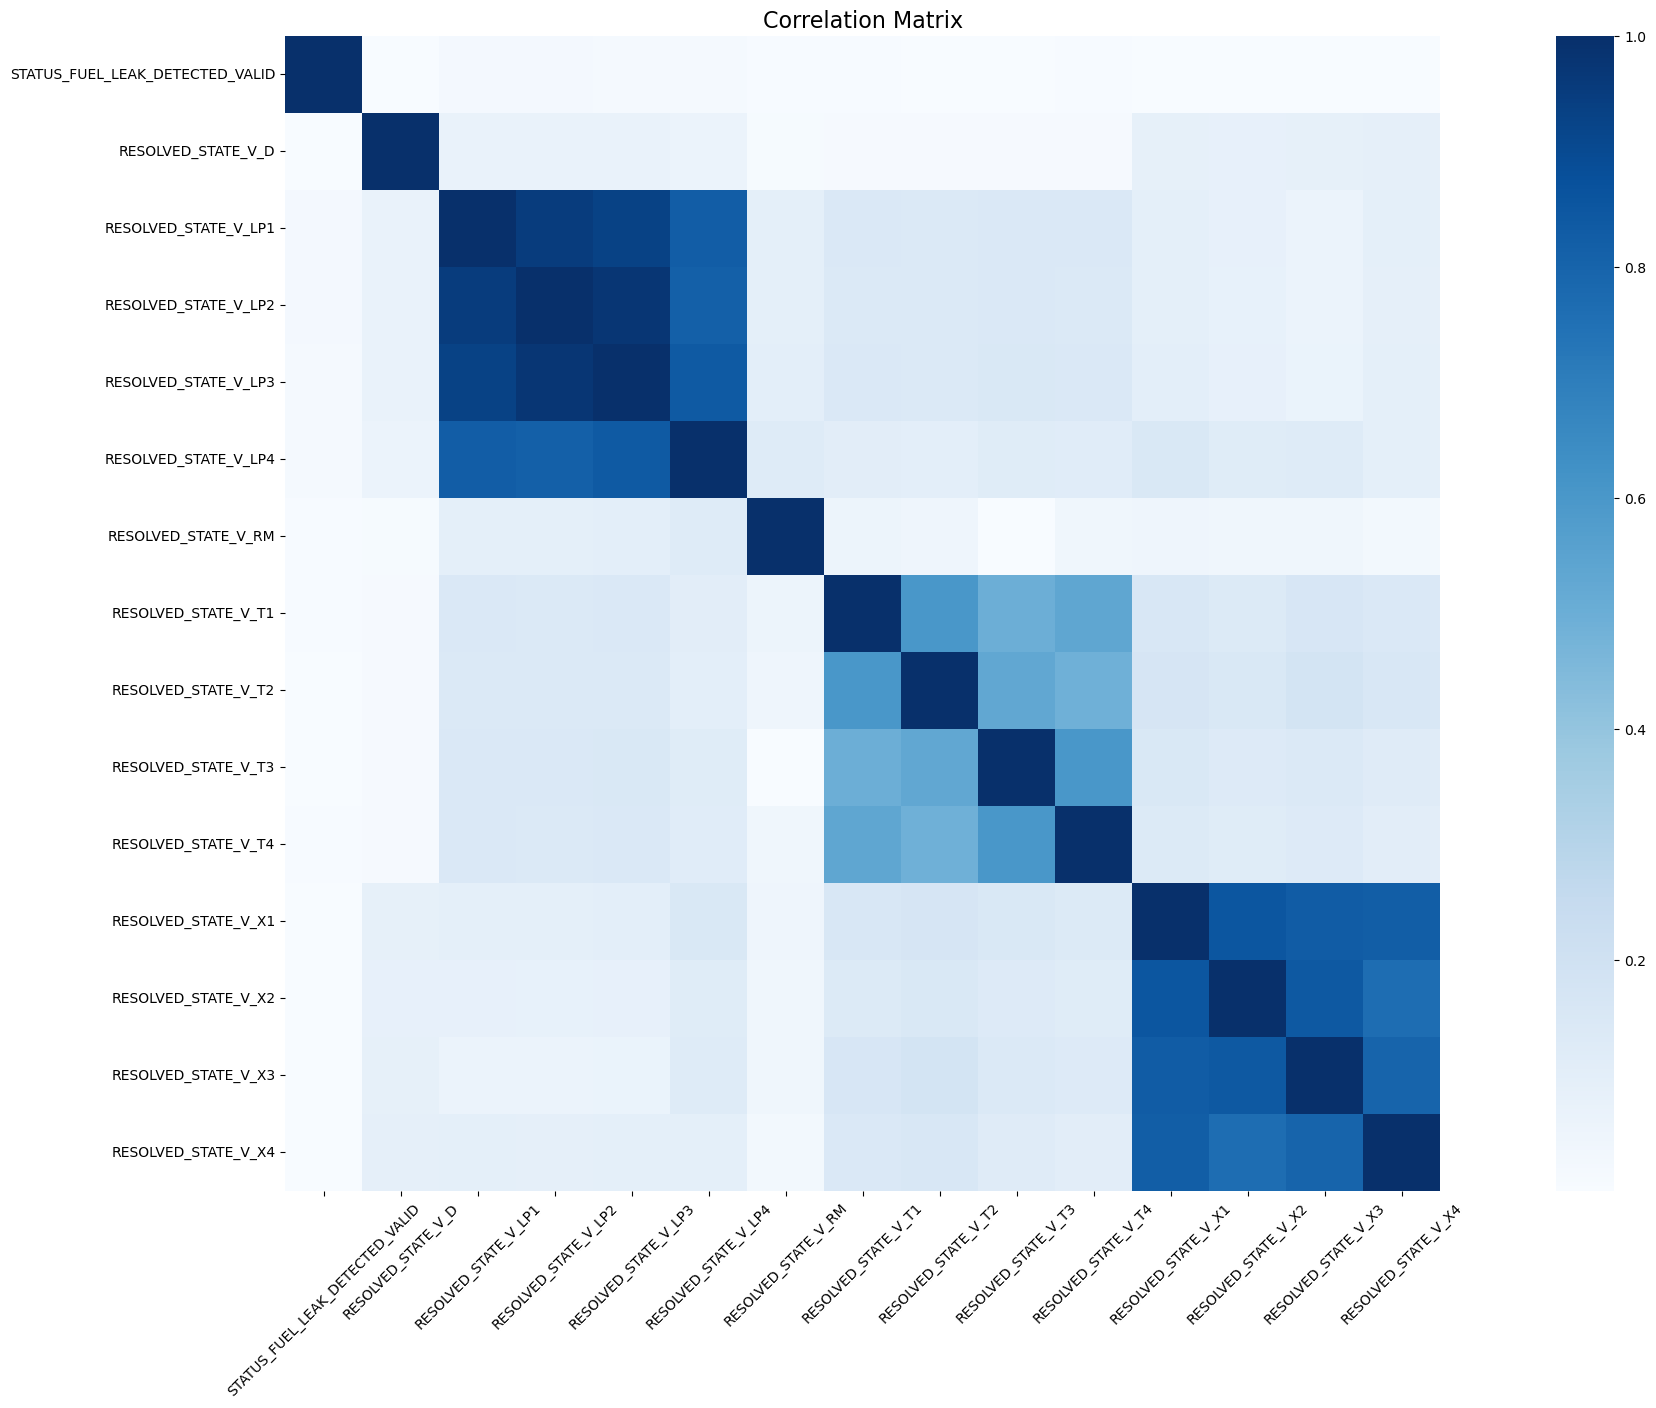

In [27]:
correlation = file_resolved.corr().abs()

# Create a heatmap with reversed diagonal values
plt.figure(figsize=(30, 15))
sns.heatmap(correlation, cmap='Blues', fmt=".2f", square=True, cbar=True)

# Rotate the tick labels on the x-axis for better readability
plt.xticks(rotation=45)

# Set the title for the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Show the heatmap
plt.show()

In [30]:
# Correlated pretty strongly within groups - but none of them are correlated much with the indicator, so going to drop all of them
file = file.drop(["RESOLVED_STATE_V_D","RESOLVED_STATE_V_LP1","RESOLVED_STATE_V_LP2","RESOLVED_STATE_V_LP3","RESOLVED_STATE_V_LP4","RESOLVED_STATE_V_RM","RESOLVED_STATE_V_T1","RESOLVED_STATE_V_T2","RESOLVED_STATE_V_T3","RESOLVED_STATE_V_T4","RESOLVED_STATE_V_X1","RESOLVED_STATE_V_X2","RESOLVED_STATE_V_X3","RESOLVED_STATE_V_X4"],axis=1)

In [31]:
file_fuel = file[["STATUS_FUEL_LEAK_DETECTED_VALID","VALUE_FOB","VALUE_FUEL_QTY_CC1","VALUE_FUEL_QTY_CC2","VALUE_FUEL_QTY_CC3","VALUE_FUEL_QTY_CC4","VALUE_FUEL_QTY_CT","VALUE_FUEL_QTY_FT1","VALUE_FUEL_QTY_FT2","VALUE_FUEL_QTY_FT3","VALUE_FUEL_QTY_FT4","VALUE_FUEL_QTY_LXT","VALUE_FUEL_QTY_RXT"]]

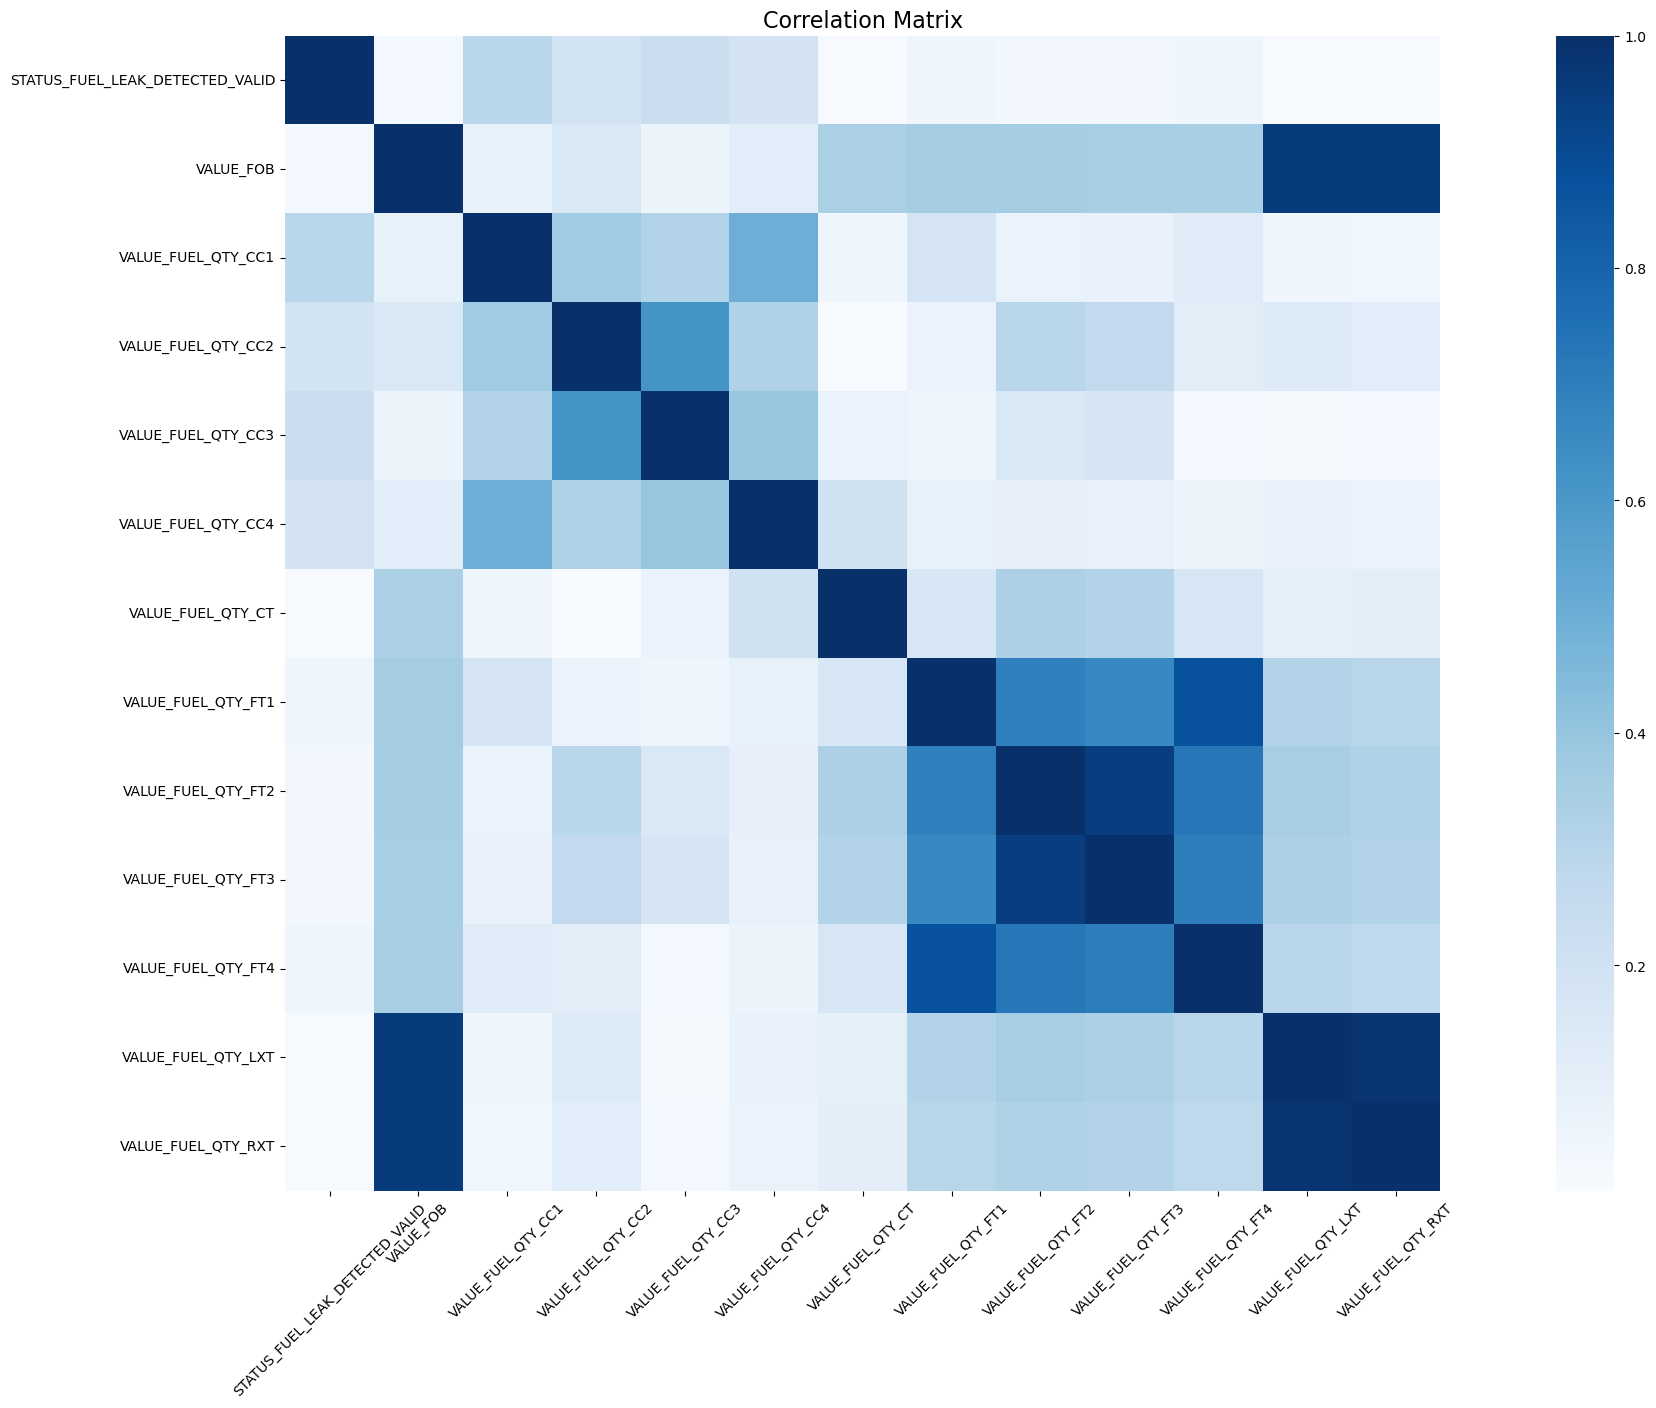

In [32]:
correlation = file_fuel.corr().abs()

# Create a heatmap with reversed diagonal values
plt.figure(figsize=(30, 15))
sns.heatmap(correlation, cmap='Blues', fmt=".2f", square=True, cbar=True)

# Rotate the tick labels on the x-axis for better readability
plt.xticks(rotation=45)

# Set the title for the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Show the heatmap
plt.show()

In [33]:
#VALUE_FUEL_QTY_RXT and VALUE_FUEL_QTY_LXT are HIGHLY correlated to VALUE_FOB, so we'll drop those two
file = file.drop(["VALUE_FUEL_QTY_RXT","VALUE_FUEL_QTY_LXT"],axis=1)

In [34]:
# Let's make combined values for the ones that are similar:
file["VALUE_FUEL_QTY_FT_sum"] = file["VALUE_FUEL_QTY_FT1"] + file["VALUE_FUEL_QTY_FT2"] + file["VALUE_FUEL_QTY_FT3"] + file["VALUE_FUEL_QTY_FT4"]
file["VALUE_FUEL_QTY_FT_avg"] = (file["VALUE_FUEL_QTY_FT1"] + file["VALUE_FUEL_QTY_FT2"] + file["VALUE_FUEL_QTY_FT3"] + file["VALUE_FUEL_QTY_FT4"]) / 4

file_fuel = file[["STATUS_FUEL_LEAK_DETECTED_VALID","VALUE_FOB","VALUE_FUEL_QTY_FT_sum","VALUE_FUEL_QTY_FT_avg","VALUE_FUEL_QTY_FT1","VALUE_FUEL_QTY_FT2","VALUE_FUEL_QTY_FT3","VALUE_FUEL_QTY_FT4"]]

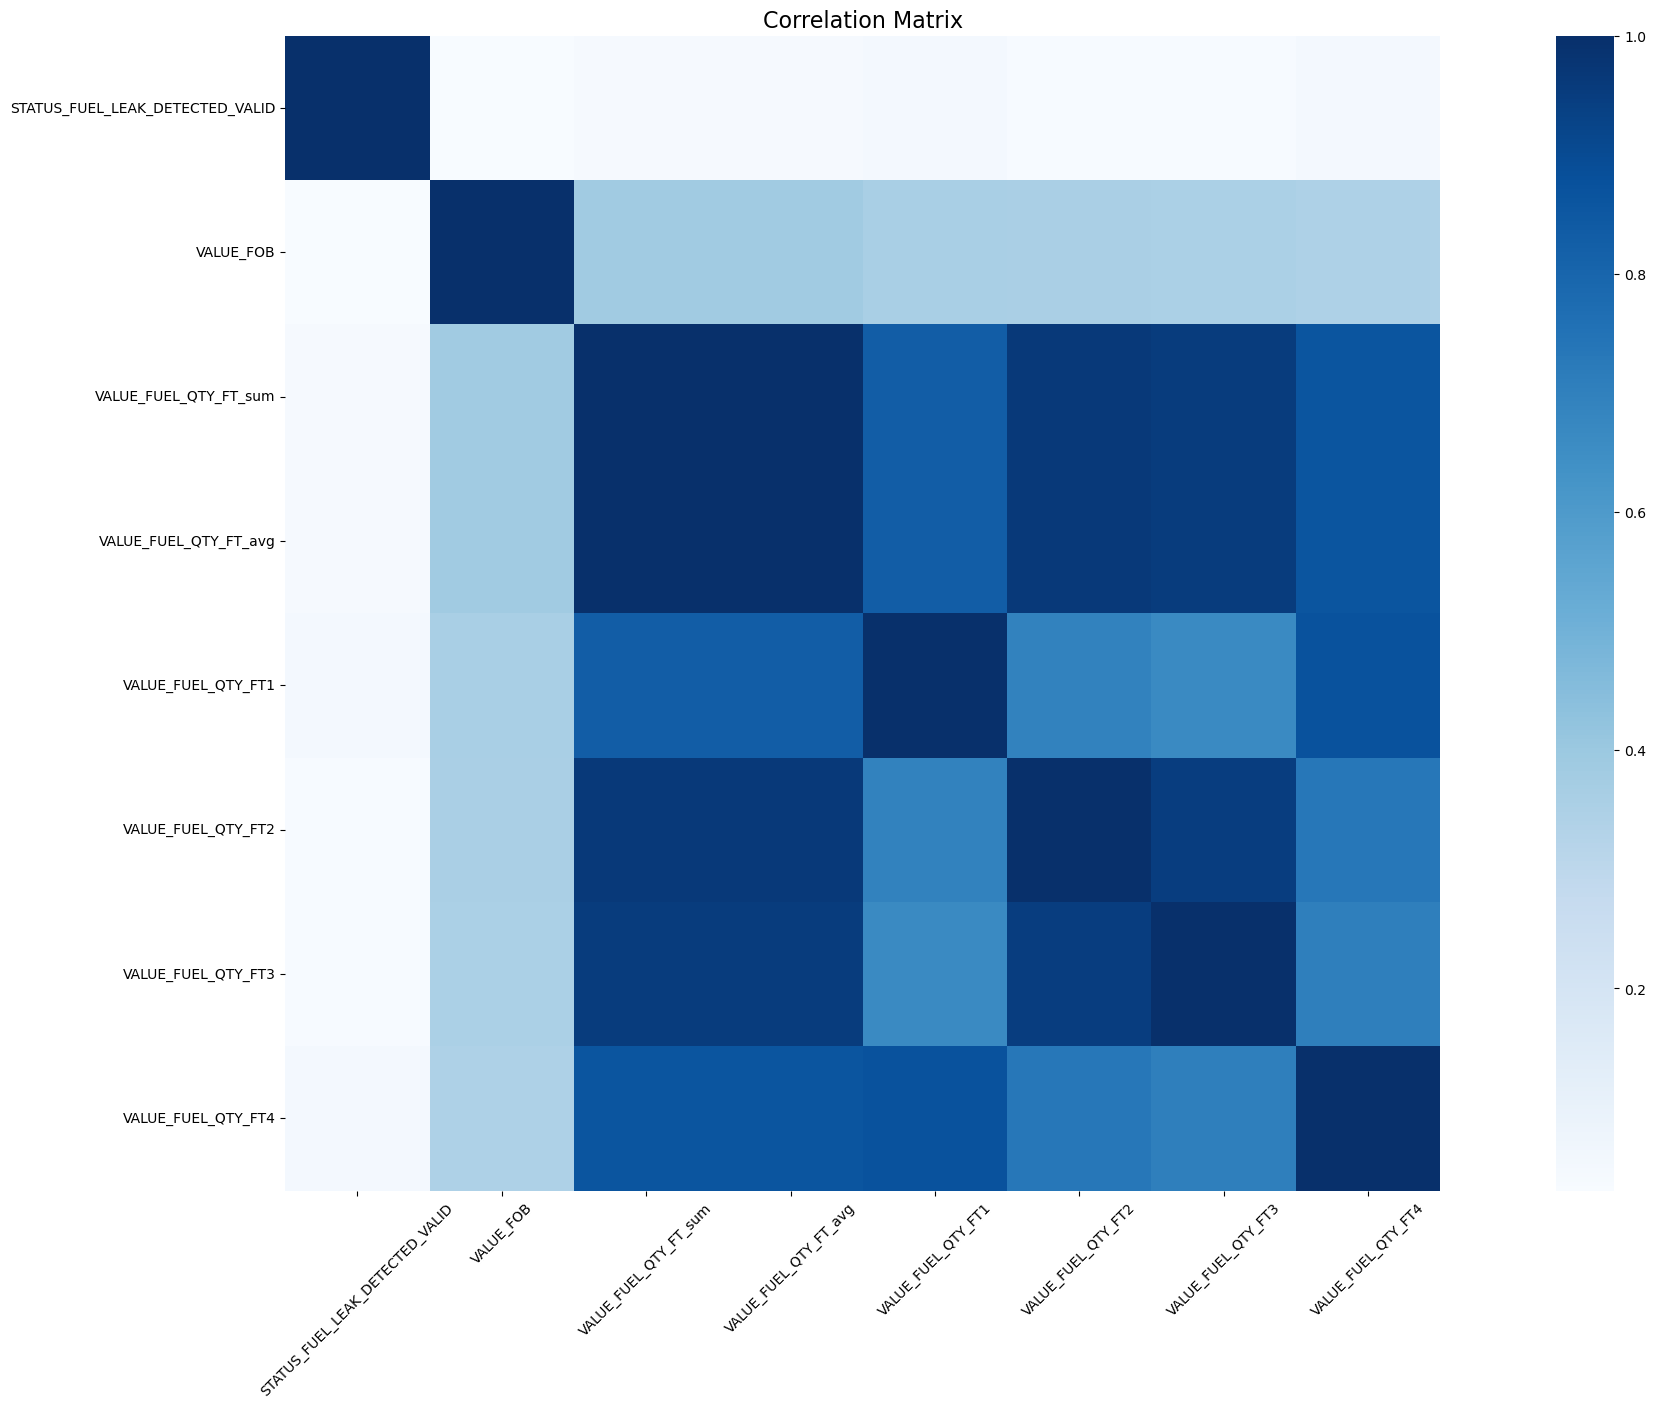

In [35]:
correlation = file_fuel.corr().abs()

# Create a heatmap with reversed diagonal values
plt.figure(figsize=(30, 15))
sns.heatmap(correlation, cmap='Blues', fmt=".2f", square=True, cbar=True)

# Rotate the tick labels on the x-axis for better readability
plt.xticks(rotation=45)

# Set the title for the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Show the heatmap
plt.show()

In [36]:
# None of these have correlation - drop
file = file.drop(["VALUE_FUEL_QTY_FT_sum","VALUE_FUEL_QTY_FT_avg","VALUE_FUEL_QTY_FT1","VALUE_FUEL_QTY_FT2","VALUE_FUEL_QTY_FT3","VALUE_FUEL_QTY_FT4","VALUE_FUEL_QTY_CC1","VALUE_FUEL_QTY_CC2","VALUE_FUEL_QTY_CC3","VALUE_FUEL_QTY_CC4","VALUE_FUEL_QTY_CT"],axis=1)

In [37]:
file_state = file[["STATUS_FUEL_LEAK_DETECTED_VALID","STATE_PMP_MAIN_FT1_ON","STATE_PMP_MAIN_FT2_ON","STATE_PMP_MAIN_FT3_ON","STATE_PMP_MAIN_FT4_ON","STATE_PMP_STBY_FT1_ON","STATE_PMP_STBY_FT2_ON","STATE_PMP_STBY_FT3_ON","STATE_PMP_STBY_FT4_ON","STATE_PMP_XFR_1_L_IMMERSED","STATE_PMP_XFR_2_L_IMMERSED","STATE_PMP_XFR_1_L_ON","STATE_PMP_XFR_2_L_ON","STATE_PMP_XFR_3_R_IMMERSED","STATE_PMP_XFR_3_R_ON","STATE_PMP_XFR_4_R_IMMERSED","STATE_PMP_XFR_4_R_LP","STATE_PMP_XFR_4_R_ON"]]

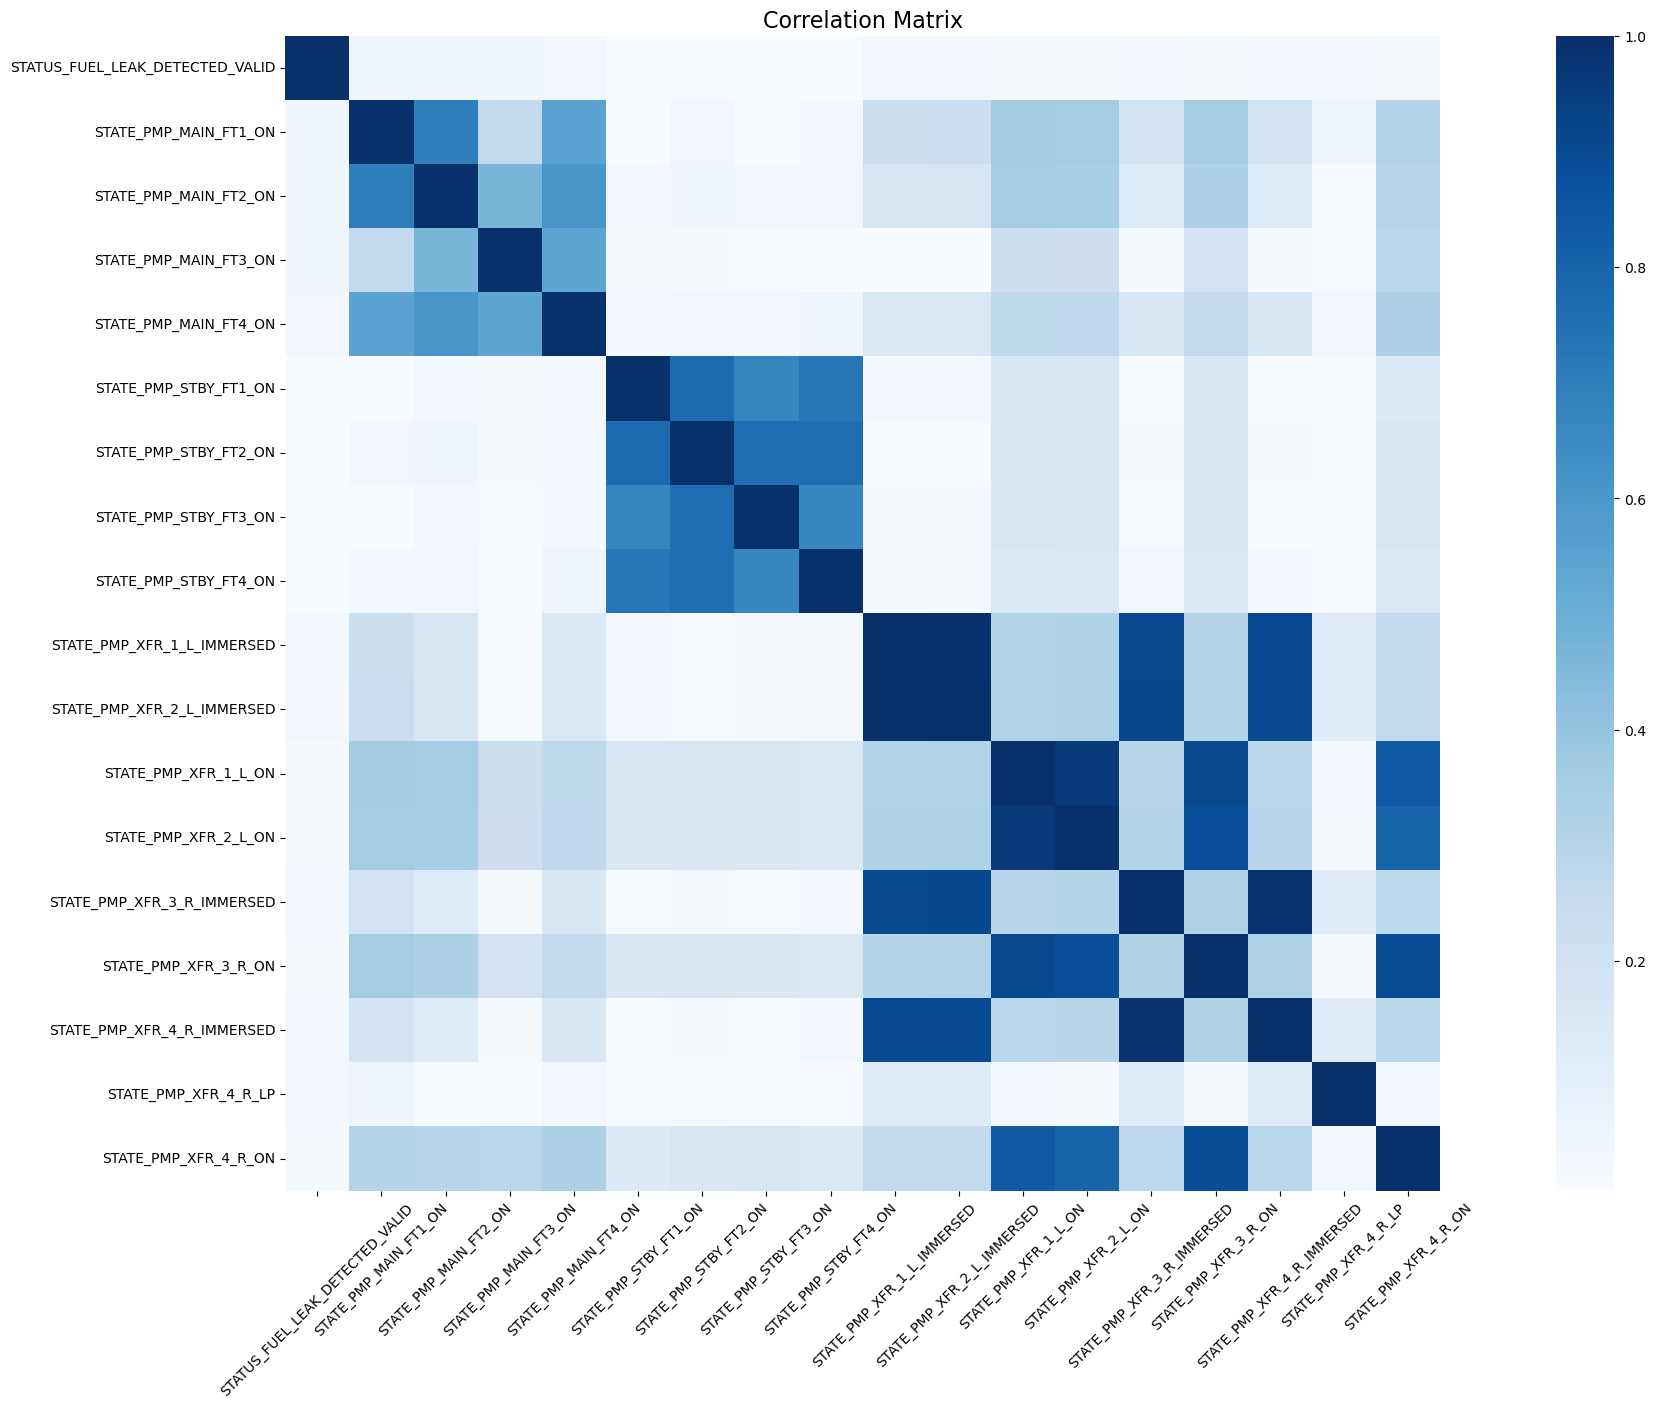

In [38]:
correlation = file_state.corr().abs()

# Create a heatmap with reversed diagonal values
plt.figure(figsize=(30, 15))
sns.heatmap(correlation, cmap='Blues', fmt=".2f", square=True, cbar=True)

# Rotate the tick labels on the x-axis for better readability
plt.xticks(rotation=45)

# Set the title for the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Show the heatmap
plt.show()

In [39]:
# Still nothing... drop
file = file.drop(["STATE_PMP_MAIN_FT1_ON","STATE_PMP_MAIN_FT2_ON","STATE_PMP_MAIN_FT3_ON","STATE_PMP_MAIN_FT4_ON","STATE_PMP_STBY_FT1_ON","STATE_PMP_STBY_FT2_ON","STATE_PMP_STBY_FT3_ON","STATE_PMP_STBY_FT4_ON","STATE_PMP_XFR_1_L_IMMERSED","STATE_PMP_XFR_2_L_IMMERSED","STATE_PMP_XFR_1_L_ON","STATE_PMP_XFR_2_L_ON","STATE_PMP_XFR_3_R_IMMERSED","STATE_PMP_XFR_3_R_ON","STATE_PMP_XFR_4_R_IMMERSED","STATE_PMP_XFR_4_R_LP","STATE_PMP_XFR_4_R_ON"],axis=1)

In [41]:
file = file.drop(["MSN"],axis=1)

In [42]:
for col in file.columns:
    print(col)

UTC_TIME
Flight
FLIGHT_PHASE_COUNT
FUEL_PITCH
FUEL_ROLL
FUEL_TRANSFER_MODE_VALUE
FW_GEO_ALTITUDE
LEAK_DETECTION_LEAK_FLOW
LSTU1_A_VOLUME
LSTU1_F_VOLUME
PITCH_ANGLE
ROLL_ANGLE
RSTU1_A_VOLUME
RSTU1_F_VOLUME
SELECTED_GADIR_ALTITUDE_VALUE
STATUS_FUEL_LEAK_DETECTED_VALID
TRANSFER_MODE
VALUE_FOB
APU_FUEL_FLOW_REQUEST_SIGNAL_1
VALUE_FUEL_VOL_LST
VALUE_FUEL_VOL_RST
STATE_MAIN_STBY_IMMERSED
FUEL_USED
FUEL_FLOW
ALT_DIFF


In [43]:
# Let's put the rest into correlation matrix
file_drop = file.drop(["UTC_TIME","Flight"],axis=1)

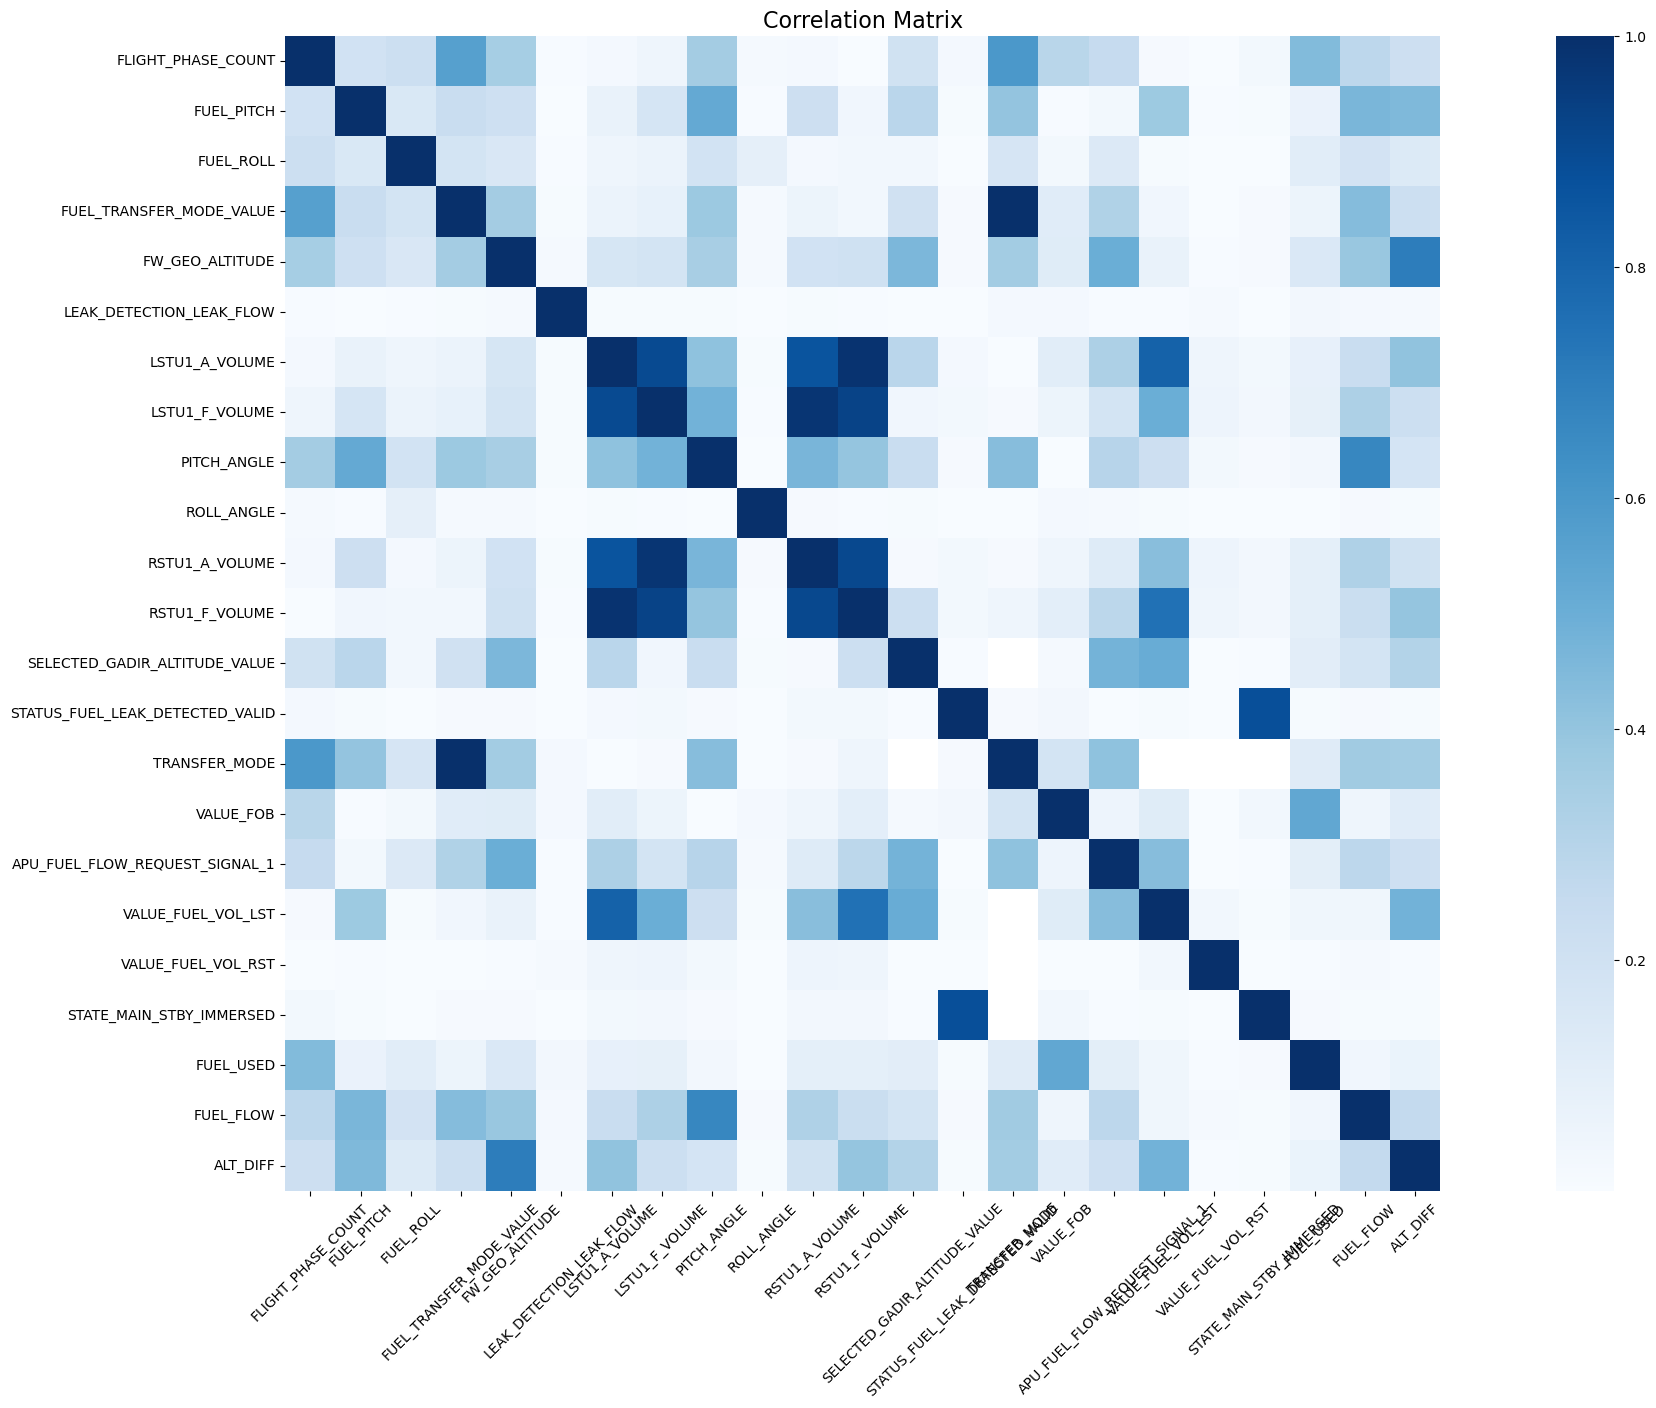

In [44]:
correlation = file_drop.corr().abs()

# Create a heatmap with reversed diagonal values
plt.figure(figsize=(30, 15))
sns.heatmap(correlation, cmap='Blues', fmt=".2f", square=True, cbar=True)

# Rotate the tick labels on the x-axis for better readability
plt.xticks(rotation=45)

# Set the title for the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Show the heatmap
plt.show()

In [46]:
# The only thing the leak seems to be correlated with is STATE_MAIN_STBY_IMMERSED - a created feature
# FUEL_FLOW is correlated with PITCH_ANGLE - does PITCH_ANGLE increase fuel flow? Should we take this into consideration when considering threshold for FUEL_FLOW to consider a leak?
# TRANSFER_MODE and FUEL_TRANSFER_MODE_VALUE highly correlated
# Let's drop LSTU1 and RSTU1 features
file = file.drop(["RSTU1_F_VOLUME","RSTU1_A_VOLUME","LSTU1_F_VOLUME","LSTU1_A_VOLUME"],axis=1)

C:\Users\kgbad\AppData\Local\Temp\ipykernel_17880\3198541750.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = file.corr().abs()


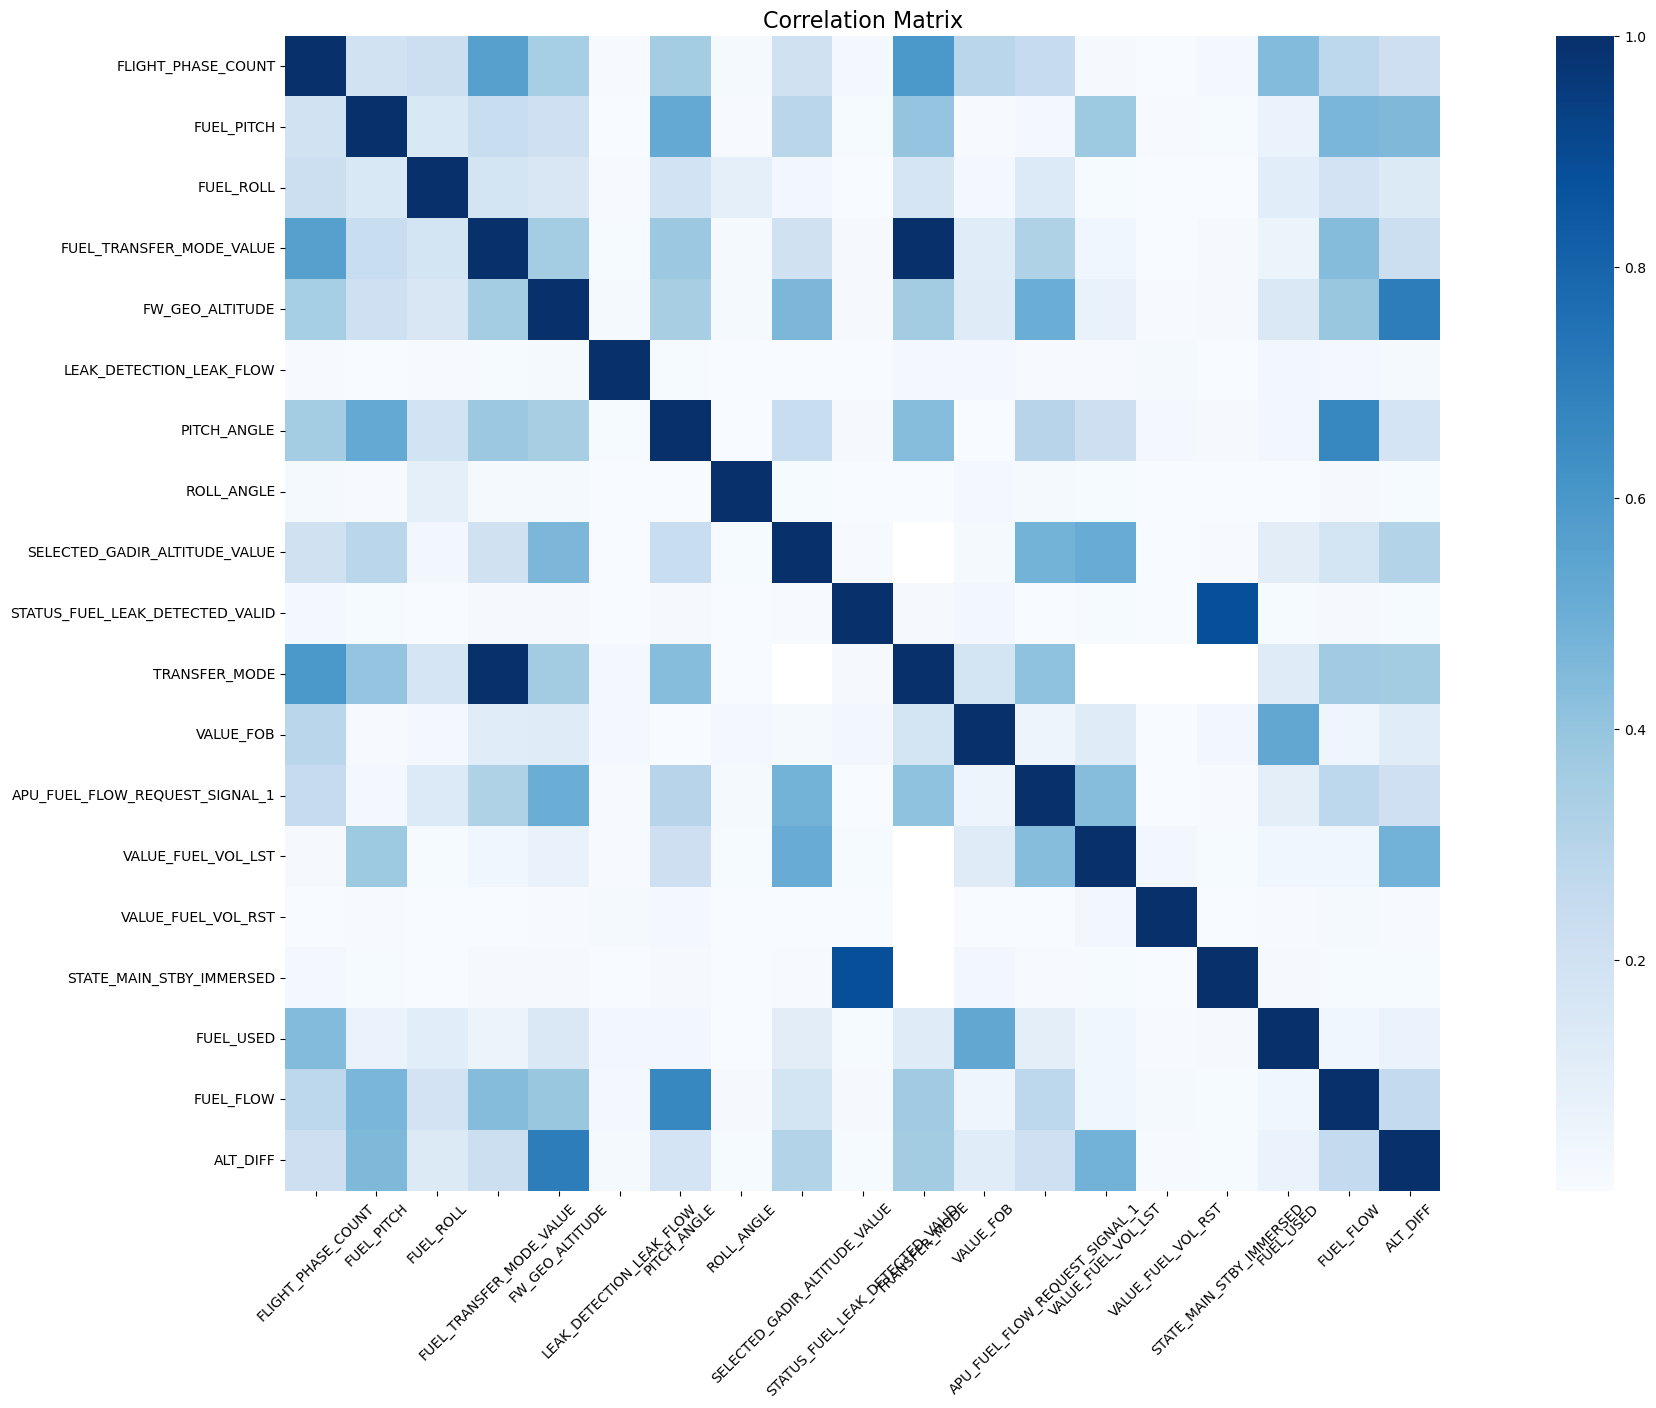

In [47]:
correlation = file.corr().abs()

# Create a heatmap with reversed diagonal values
plt.figure(figsize=(30, 15))
sns.heatmap(correlation, cmap='Blues', fmt=".2f", square=True, cbar=True)

# Rotate the tick labels on the x-axis for better readability
plt.xticks(rotation=45)

# Set the title for the heatmap
plt.title('Correlation Matrix', fontsize=16)

# Show the heatmap
plt.show()